In [62]:
import pandas as pd
import numpy as np
import os, pickle, datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load and combine the files
series = pd.read_csv('../data/WDISeries.csv')
series = series[['Series Code', 'Topic', 'Long definition', 
                 'Unit of measure', 'Periodicity', 'Base Period']]
countries = pd.read_csv('../data/WDICountry.csv')
countries.dropna(subset = ['Currency Unit'], inplace=True)
countries = countries[['Country Code', 'Short Name', 'Region', 'Income Group']]
df = pd.read_csv('../data/WDICSV.csv')
df = pd.merge(df, series, left_on=['Indicator Code'], right_on=['Series Code'], how='left')
df = pd.merge(df, countries, left_on=['Country Code'], right_on=['Country Code'], how='inner')

In [64]:
t=df['Indicator Name'].value_counts()
t

Indicator Name
Young people (ages 15-24) newly infected with HIV                                                                                               217
Access to clean fuels and technologies for cooking (% of population)                                                                            217
Access to clean fuels and technologies for cooking, rural (% of rural population)                                                               217
Access to clean fuels and technologies for cooking, urban (% of urban population)                                                               217
Access to electricity (% of population)                                                                                                         217
                                                                                                                                               ... 
Adequacy of social protection and labor programs (% of total welfare of beneficiary households)  

In [65]:
# Filter the data
metrics = [
    'Mobile cellular subscriptions (per 100 people)',
    'Individuals using the Internet (% of population)',
    'GNI per capita, PPP (constant 2021 international $)',
    'Literacy rate, adult total (% of people ages 15 and above)'
]

df = df[df['Indicator Name'].isin(metrics)]

countries = ['Kenya', 'Rwanda', 'Ecuador', 'India', 'United States']
df = df[df['Country Name'].isin(countries)]

cols = ['Country Name', 'Indicator Name', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023']

df = df[cols]

In [66]:
df

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
86961,Ecuador,"GNI per capita, PPP (constant 2021 internation...",11509.926424,12559.810651,13022.760620,13750.870061,14141.678096,13407.531628,13191.817865,13888.376348,13787.762211,13558.995494,11915.734380,13289.089770,13879.403613,13953.893780
87077,Ecuador,Individuals using the Internet (% of population),29.000000,31.400000,35.100000,40.300000,45.600000,48.900000,54.100000,55.800000,57.500000,59.200000,70.700000,69.100000,69.700000,72.700000
87168,Ecuador,"Literacy rate, adult total (% of people ages 1...",92.000000,92.000000,92.000000,93.000000,94.000000,94.000000,94.000000,93.000000,NaN,NaN,94.000000,94.000000,94.000000,NaN
87249,Ecuador,Mobile cellular subscriptions (per 100 people),98.036900,100.042000,105.680000,105.182000,103.559000,79.574600,84.108800,87.421400,92.511800,91.424900,88.255500,94.950600,98.130900,101.032000
135473,India,"GNI per capita, PPP (constant 2021 internation...",5108.182693,5291.765708,5467.823986,5687.583867,6019.476852,6454.492856,6931.293090,7405.774307,7712.998433,8065.395103,7551.830309,7955.246984,8376.566658,9439.689490
135589,India,Individuals using the Internet (% of population),7.500000,10.100000,11.100000,12.300000,13.500000,14.900000,16.500000,18.200000,20.100000,29.500000,43.400000,NaN,55.900000,NaN
135680,India,"Literacy rate, adult total (% of people ages 1...",NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.000000,77.000000
135761,India,Mobile cellular subscriptions (per 100 people),60.490600,70.872600,67.626400,68.396700,71.936700,75.379300,83.917800,85.970400,85.550100,82.898100,82.254000,81.604000,80.181800,80.563200
153665,Kenya,"GNI per capita, PPP (constant 2021 internation...",3528.746242,3573.074516,3698.906412,3726.890948,3873.384001,4101.343182,4596.509863,4655.682099,4845.161045,5026.863825,4993.717922,5264.441086,5370.977856,5538.849754
153781,Kenya,Individuals using the Internet (% of population),7.200000,8.800000,10.500000,13.000000,16.500000,16.600000,16.600000,17.800000,19.500000,22.700000,NaN,NaN,NaN,35.000000


In [67]:
df_long = df.melt(id_vars=['Country Name', 'Indicator Name'], 
                  value_vars=[str(y) for y in range(2010, 2024)],
                  var_name='Year', value_name='Value')

In [68]:
df_long

,Country Name,Indicator Name,Year,Value
0,Ecuador,"GNI per capita, PPP (constant 2021 internation...",2010,11509.926424
1,Ecuador,Individuals using the Internet (% of population),2010,29.000000
2,Ecuador,"Literacy rate, adult total (% of people ages 1...",2010,92.000000
3,Ecuador,Mobile cellular subscriptions (per 100 people),2010,98.036900
4,India,"GNI per capita, PPP (constant 2021 internation...",2010,5108.182693
...,...,...,...,...
275,Rwanda,Mobile cellular subscriptions (per 100 people),2023,91.462300
276,United States,"GNI per capita, PPP (constant 2021 internation...",2023,74427.569662
277,United States,Individuals using the Internet (% of population),2023,93.100000
278,United States,"Literacy rate, adult total (% of people ages 1...",2023,NaN


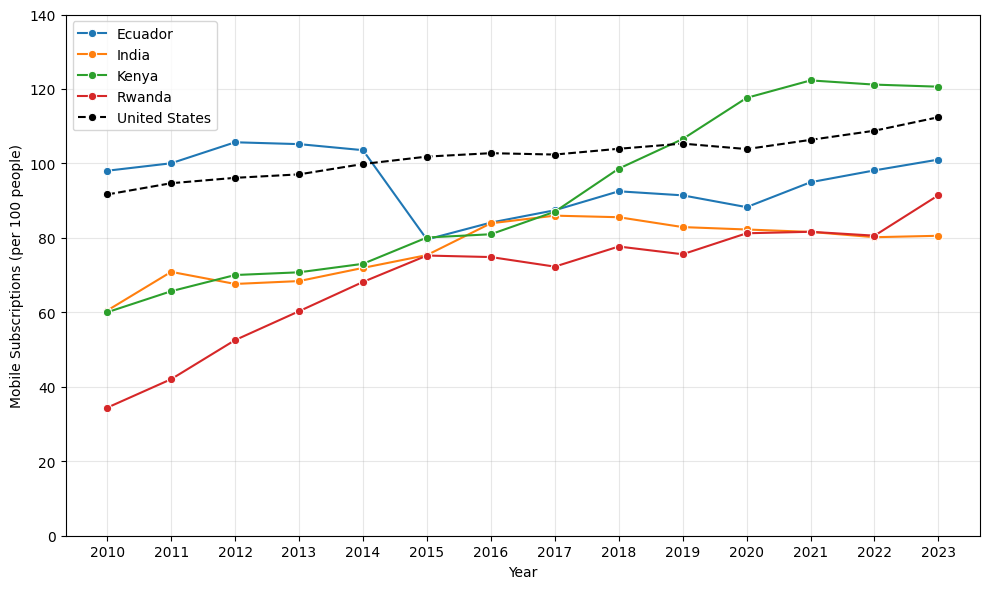

In [69]:
plt.figure(figsize=(10, 6))

data = df_long[df_long['Indicator Name'] == 'Mobile cellular subscriptions (per 100 people)']

# Plot all countries except United States
sns.lineplot(data=data[data['Country Name'] != 'United States'],
             x='Year', y='Value', hue='Country Name', marker='o')

# Overlay United States with black dashed line
sns.lineplot(data=data[data['Country Name'] == 'United States'],
             x='Year', y='Value', color='black', linestyle='--', marker='o', label='United States')

plt.ylabel('Mobile Subscriptions (per 100 people)')
plt.yticks(range(0, 141, 20))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../output/mobile_subscriptions.pdf')

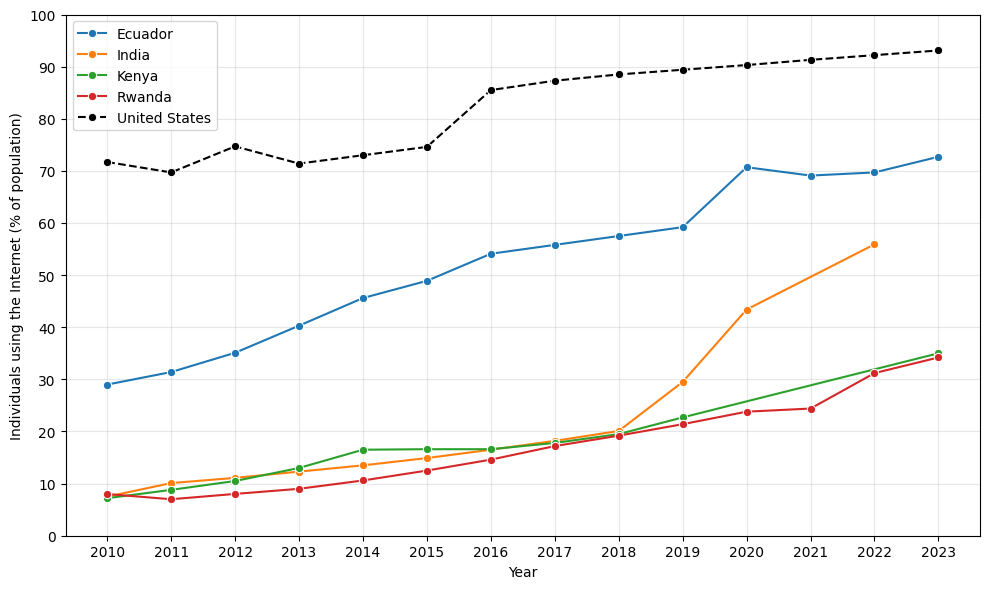

In [70]:
plt.figure(figsize=(10, 6))

data = df_long[df_long['Indicator Name'] == 'Individuals using the Internet (% of population)']

# Plot all countries except United States
sns.lineplot(data=data[data['Country Name'] != 'United States'],
             x='Year', y='Value', hue='Country Name', marker='o')

# Overlay United States with black dashed line
sns.lineplot(data=data[data['Country Name'] == 'United States'],
             x='Year', y='Value', color='black', linestyle='--', marker='o', label='United States')

plt.ylabel('Individuals using the Internet (% of population)')
plt.yticks(range(0, 101, 10))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../output/individuals_using_internet.pdf')

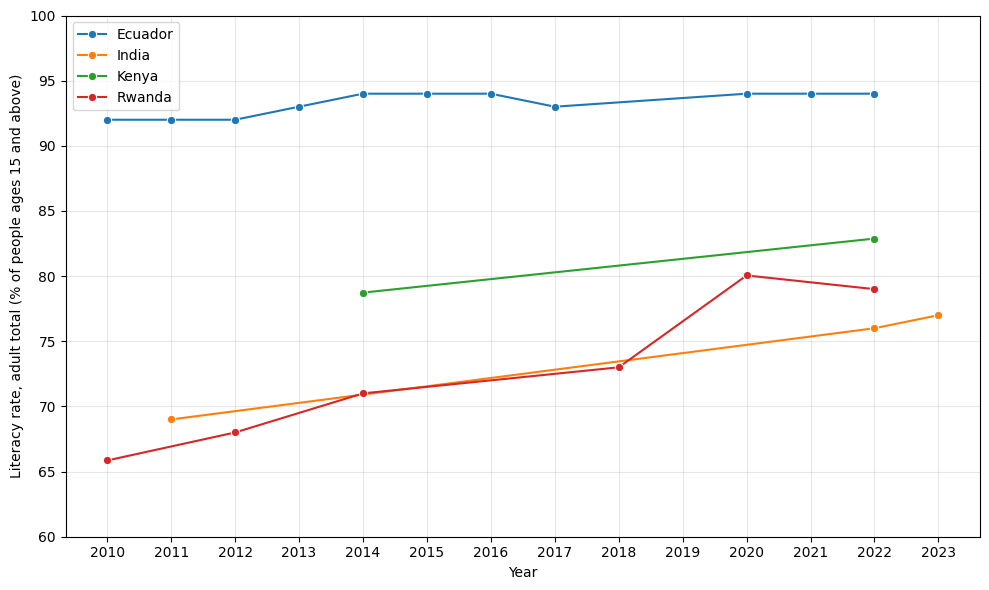

In [77]:
plt.figure(figsize=(10, 6))

data = df_long[df_long['Indicator Name'] == 'Literacy rate, adult total (% of people ages 15 and above)']

# Plot all countries except United States
sns.lineplot(data=data[data['Country Name'] != 'United States'],
             x='Year', y='Value', hue='Country Name', marker='o')

plt.ylabel('Literacy rate, adult total (% of people ages 15 and above)')
plt.yticks(range(60, 101, 5))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../output/literacy_rate.pdf')

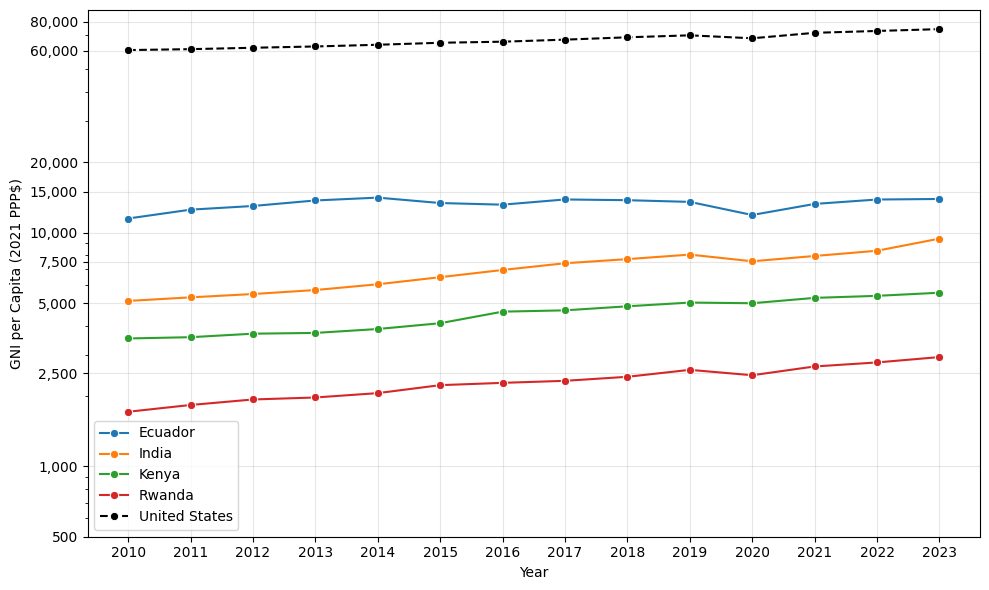

In [72]:
plt.figure(figsize=(10, 6))

data = df_long[df_long['Indicator Name'] == 'GNI per capita, PPP (constant 2021 international $)']

# Plot all countries except United States
sns.lineplot(data=data[data['Country Name'] != 'United States'],
             x='Year', y='Value', hue='Country Name', marker='o')

# Overlay United States with black dashed line
sns.lineplot(data=data[data['Country Name'] == 'United States'],
             x='Year', y='Value', color='black', linestyle='--', marker='o', label='United States')
plt.ylabel('GNI per Capita (2021 PPP$)')
plt.yscale('log')

# Set ticks at desired positions and labels
ticks = [500, 1000, 2500, 5000, 7500, 10000, 15000, 20000, 60000, 80000]
plt.yticks(ticks, [f"{t:,}" for t in ticks])

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../output/income_per_capita.pdf')